### Lab 3_2: Decision Tree

In [12]:
import pandas as pd
import scipy as sp
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

## 0. Data Loading

In [13]:
#load data and extract data
names = ['age', 'workclass', 'fnlwgt', 'edu', 'edu-num', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv('adult.data', names=names)
print( "Total columns: ", len(df.columns))
df.head()                 # display all columns
#df[df.columns[:10]].head() # display the first 10 columns

Total columns:  15


,age,workclass,fnlwgt,edu,edu-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   edu             32561 non-null  object
 4   edu-num         32561 non-null  int64 
 5   maritalstatus   32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
from sklearn import preprocessing

# it is required that all feature/target values be numerical
# Systematically convert all string (labeled as object) type into labels(1,2,3,...)
label_encoding = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = label_encoding.fit_transform(df[column_name])
    else:
        pass

In [16]:
# extract X, y
y = df['income']      # two labels: <=50K, >50K
X = df.drop('income', axis=1)

## 1. Decision Tree With Gini Index

In [17]:
# your code below

# create a decision tree classifier (gini, max_depth=2)
clf = DecisionTreeClassifier(criterion='gini',max_depth=2)
clf = clf.fit(X,y)



In [18]:
# generate the image
from sklearn.tree import export_graphviz
from six import StringIO  

dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['i','n'])


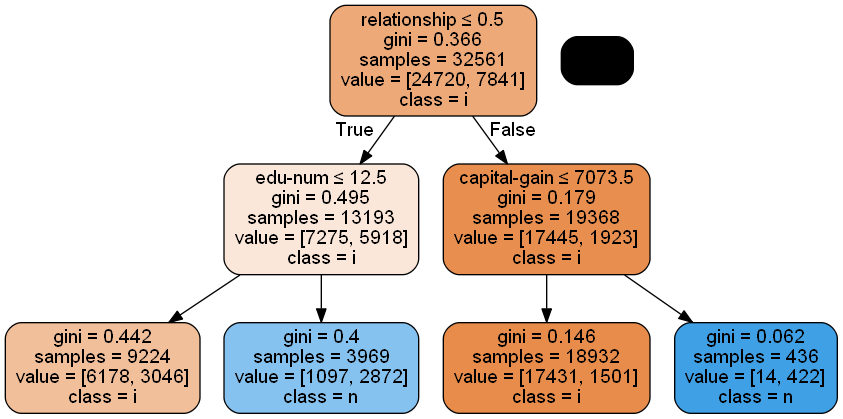

In [19]:
# display the image here
from IPython.display import Image  
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 2. Decision Tree With Entropy

In [20]:
# your code below

# create a decision tree classifier (entropy, max_depth=2)
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = clf.fit(X,y)


In [21]:
# generate the image
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,  
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names = X.columns,
    class_names=['i','n'])

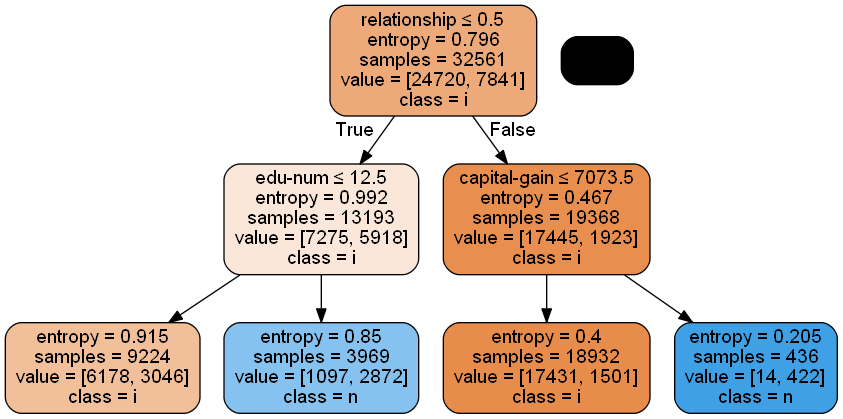

In [22]:
# display the image here
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())